# Multiple Linear Regression Model on Housing Dataset

 Steps to involved in building a Multiple Regression Model 

 1. Reading, Understanding and Visualizing the data
 2. Preparing the data for Modelling ( Train-Test Split, Rescaling, etc. )
 3. Training the Model
 4. Residual Model
 5. Prediction and analysis on the test data

## Step 1: Reading and Understanding data

In [11]:
# supressing warnings

import warnings
warnings.filterwarnings('ignore')

In [12]:
# for dataframe manipulation 
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
# for numerical analysis
import numpy as np

# for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# for identifying encoding scheme
import chardet

# for regression 
import statsmodels.api as sm 
import sklearn 
from sklearn.model_selection import train_test_split

# for scaling 
from sklearn.preprocessing import MinMaxScaler

# measuring VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculating R-squared value
from sklearn.metrics import r2_score

In [13]:
# identifying encoding scheme

def encoding(file):
    read = open(file,'rb').read()
    encode = chardet.detect(read).get('encoding')
    return encode

encoding('HousingCopy.csv')

'ascii'

In [14]:
# reading data

data = pd.read_csv('HousingCopy.csv',encoding='ascii')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Inspecting various aspects of the data

In [15]:
data.shape

(545, 13)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [17]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00000,545.00000,545.00000,545.00000,545.00000,545.00000
mean,"4,766,729.24771","5,150.54128",2.96514,1.28624,1.80550,0.69358
std,"1,870,439.61566","2,170.14102",0.73806,0.50247,0.86749,0.86159
min,"1,750,000.00000","1,650.00000",1.00000,1.00000,1.00000,0.00000
25%,"3,430,000.00000","3,600.00000",2.00000,1.00000,1.00000,0.00000
50%,"4,340,000.00000","4,600.00000",3.00000,1.00000,2.00000,0.00000
75%,"5,740,000.00000","6,360.00000",3.00000,2.00000,2.00000,1.00000
max,"13,300,000.00000","16,200.00000",6.00000,4.00000,4.00000,3.00000


**Firstly**, we need to ensure that the **target variable has** some sort of **linear relation** with the **predictor variables**.  
Only then can we move ahead with the linear regression.  
The easiest way of doing this is building a **scatter plot** between target and perdictor variables. 

Next we would like to identify **Multicollinearity** between predictor variables.

## Visualising Data

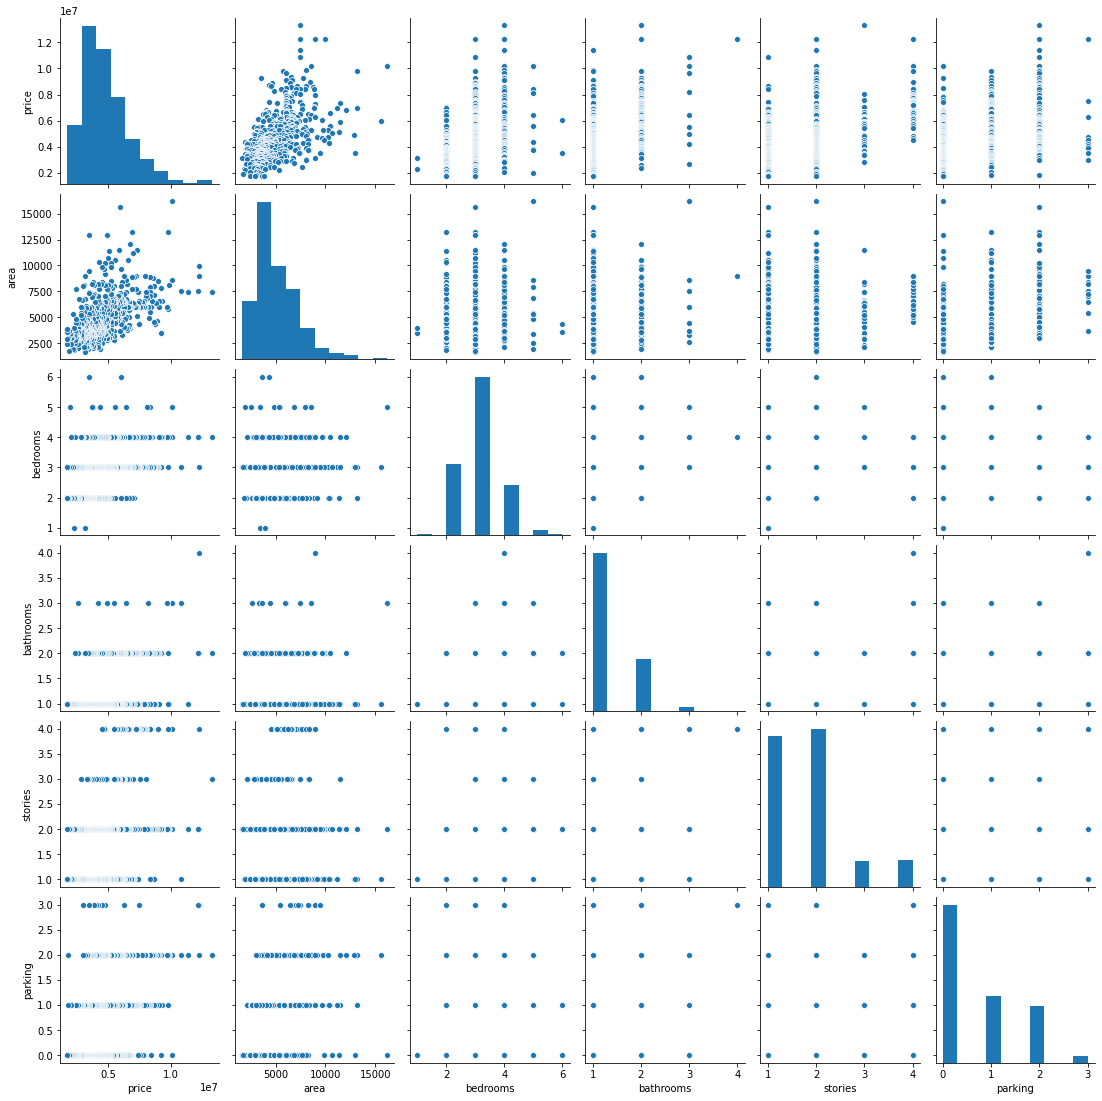

In [18]:
# visualising the numeric variables 

sns.pairplot(data)
plt.show()

From the above pairplot we can conclude that there is some linear relation between **area-price**

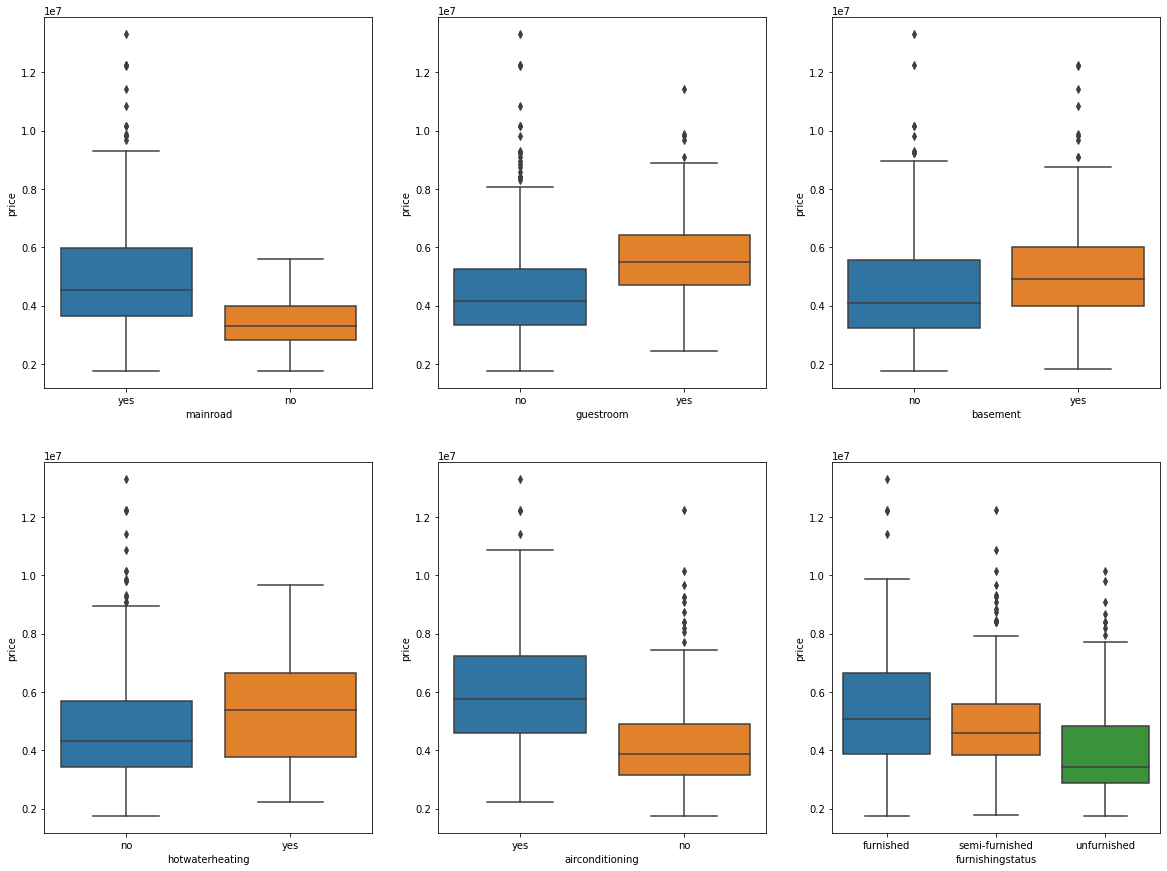

In [19]:
# visualising the categorical variables
# relations between categorical and continuous variables can be effectively plotted using box plots

plt.figure(figsize=(20,15))

plt.subplot(231)
sns.boxplot(x=data.mainroad,y=data.price)

plt.subplot(232)
sns.boxplot(x=data.guestroom,y=data.price)

plt.subplot(233)
sns.boxplot(x=data.basement,y=data.price)

plt.subplot(234)
sns.boxplot(x=data.hotwaterheating,y=data.price)

plt.subplot(235)
sns.boxplot(x=data.airconditioning,y=data.price)

plt.subplot(236)
sns.boxplot(x=data.furnishingstatus,y=data.price)

## Step 2 : Preparing the Data for Modelling

1. Encoding
    - Converting binary categorical variables to 0's/1's
    - Converting other categorical vatiables to dummy variables
2. Splitting into train and test data
3. Rescaling the variables

In [20]:
# converting binary categorical variables 

var_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

data[var_list] = data[var_list].apply(lambda x : x.map({'yes':1,'no':0}))
data[var_list].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


### Creating Dummy Variables

In [21]:
dummy = pd.get_dummies(data.furnishingstatus,drop_first=True)
dummy.head(10)

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


`00` corresponds to **Furnished**  
`10` corresponds to **Semi-Furnished**  
`01` corresponds to **Unfurnished**  

In [22]:
data = pd.concat([data,dummy],axis = 1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [23]:
# dropping the furnishingstatus column

data = data.drop('furnishingstatus',axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 2 : Preparing the data for modelling 

In [24]:
# Spliting the data into Training and Testing dataset

data_train , data_test = train_test_split(data,train_size=0.7,random_state=100)
print(data_train.shape)
print(data_test.shape)

(381, 14)
(164, 14)


**Rescaling** is not so **important** in **Simple Linear Regression**, but plays a **significant** role in **Multiple Linear Regression**     
As we can see the difference in the scaling of area v/s the other variables is very high, the coefficient of other variables will naturally be high and coefficient will be low.  
Therfore it is imp that the variables are at a comparable scale so that their coefficients are at a comparable scale.


``Advantages of scaling`` 
- interpretability 
- if the values are in the range 0-1 the optimization happens at a much larger scale (Gradient Descent Function).

``Two types of scaling`` 
1. Min-Max Scaling (Normalisation)  - **Compresses the data between 0 and 1**   
2. Standardisation (Mean-0, Sigma-1) - **Centers the mean around 0**   

Normalisation of x = (x - xmin)/(xmax - xmin)   
Standardisation of x = (x - mean)/sigma 

**Normalisation**, in most cases if **preferred** over Standardisation as it also **handles outliers**.

In [25]:
# Instantiate an object of MinMaxScaler class
scalar = MinMaxScaler()

In [26]:
# Scaling all numeric variables except binary and dummy variables 

num_var = ['area','bedrooms','bathrooms','stories','parking','price']

`fit()` - Learns the Xmax and Xmin values `fit() learns what needs to be done`   
We perform `fit()` **only** on the **train dataset** and **not on test dataset** as `fit()` learns the parameters from the training dataset, and if we use `fit()` on the test dataset we would be learning new parameters and would not be able to predict accurately  
`transform()` - performs the computation (x - xmin)/(xmax - xmin) `transform() performs the operation `  
`fit_transform()` - almost same as `fit()`

In [27]:
data_train[num_var] = scalar.fit_transform(data_train[num_var])
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.16970,0.15523,0.40000,0.00000,0.00000,1,0,0,0,0,0.33333,0,0,1
19,0.61515,0.40338,0.40000,0.50000,0.33333,1,0,0,0,1,0.33333,1,1,0
159,0.32121,0.11563,0.40000,0.50000,0.00000,1,1,1,0,1,0.00000,0,0,0
35,0.54813,0.45442,0.40000,0.50000,1.00000,1,0,0,0,1,0.66667,0,0,0
28,0.57576,0.53801,0.80000,0.50000,0.33333,1,0,1,1,0,0.66667,0,0,1


In [28]:
data_train[num_var].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,381.00000,381.00000,381.00000,381.00000,381.00000,381.00000
mean,0.28871,0.38635,0.13648,0.26859,0.24234,0.26033
std,0.18142,0.14734,0.23733,0.29500,0.28593,0.15761
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.15523,0.20000,0.00000,0.00000,0.00000,0.15152
50%,0.23442,0.40000,0.00000,0.33333,0.00000,0.22121
75%,0.39810,0.40000,0.50000,0.33333,0.33333,0.34545
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


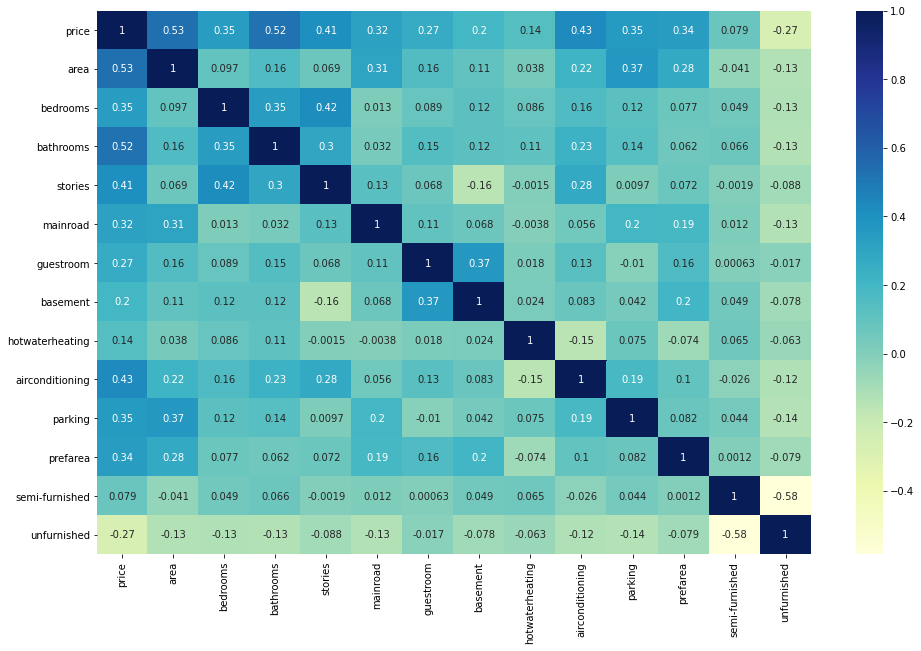

In [29]:
plt.figure(figsize=(16,10))
sns.heatmap(data_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Step 3 : Model building

In [30]:
# Creating X and y variables 

y_train = data_train.pop('price')
X_train = data_train

We will keep adding one variable at time and measure it's statistical significance    
And also calculate the VIF if the variables are correlated to many other variables  

In [31]:
# Selecting only 'area' for the analysis 

# adding a constant 

X_train_sm = sm.add_constant(X_train.area)

In [32]:
# Creating model 

lr = sm.OLS(y_train,X_train_sm)

In [33]:
# Fitting the model 

lr_model = lr.fit()
lr_model.params

const   0.12689
area    0.46219
dtype: float64

We can see that the relation between area and price is positive.   
Area value increases, price increases  

In [34]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           3.15e-29
Time:                        16:22:39   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we see the ``p-value`` is zero, it is **statistically significant**   
and the ``R-squared`` value is 0.28, i.e, around **28% of variance is explained by area**, which is an decent value but we would like to **improve the model**, therefore we **add another variable**    

In [35]:
# add another variable, bathroom 

X_train_sm = X_train[['area','bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)


# Creating model 

lr = sm.OLS(y_train,X_train_sm)


# Fitting model

lr_model = lr.fit()


# Inspecting model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           2.51e-54
Time:                        16:23:23   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we see the ``P-values`` are **zero**, which means that the values are significant  
and the ``R-squared`` value has **increased from 28% to 46%** 

In [36]:
# adding new variable, bedrooms 

X_train_sm = X_train[['area','bathrooms','bedrooms']]
X_train_sm = sm.add_constant(X_train_sm)

# building model

lr = sm.OLS(y_train,X_train_sm)

# fitting model

lr_model = lr.fit()

# inspecting model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           3.12e-57
Time:                        16:23:32   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that there is an increase in the ``R-squared`` value by **2%**, which is significant enough to include the variable in the model

Similarly we do this for all variables, we **do not add an variable** if the **increase** in the ``R-squared`` **value is very low (around 0.05)** and **the p-value is very high** 

But using the above method becomes very tedious when the number of variables in the data are high   
So we use another approach, i.e, adding all variables and eliminating variables that are not significant  

### Adding all the variables 

In [37]:
# adding a constant to the data

X_train_sm = sm.add_constant(X_train)


# building a model 

lr = sm.OLS(y_train,X_train_sm)


# fitting the model 

lr_model = lr.fit()


# inspecting the model 

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           8.83e-83
Time:                        16:24:17   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the ``p-value`` of the **constant** is **high**, which means that the **line mostly passes through the origin, or very close to origin**  

And the ``p-values`` of the variables ``bedrooms`` and ``semi-furnished`` is very high  
values above **0.05(confidence interval 5%)** are high and otherwise low   

### Criteria to determine if the variable needs to be dropped

#### 1.Significance of variables determined using p-values
#### 2. VIF ( measure of correlation of variable with other variables ) 

### Calculating VIF

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

So what does it mean to have a VIF of 5 ?  

According to the formula   

5 = 1/(1-R2)  
1-R2 = 0.2  
R2 = 0.8   

Which means that if we take the **variable with VIF value 5 as the target variable** and **all other variables as predictor variables** we see that about **80% of the data in target variable is explained by other variables** 

In [38]:
# VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,7.33000
4,mainroad,6.02000
0,area,4.67000
3,stories,2.70000
11,semi-furnished,2.19000
9,parking,2.12000
6,basement,2.02000
12,unfurnished,1.82000
8,airconditioning,1.77000
2,bathrooms,1.67000


**Conditions involving p-values and VIF**

- ``High p-value, High VIF`` : Drop variable
- ``High p-value, Low VIF`` : Lead with this condition
- ``Low p-value, High VIF``
- ``Low p-value, Low VIF`` : Keep the variable 

We consider p-value as the primary parameter as the value of VIF depends on other variables

In [39]:
# dropping semi-furnished

X = X_train.drop('semi-furnished',axis=1)

In [40]:
# adding constant 

X_train_sm = sm.add_constant(X)


# model building

lr = sm.OLS(y_train,X_train_sm)


# model fitting

lr_model = lr.fit()


# inspecting model 

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.07e-83
Time:                        16:27:45   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,6.59000
4,mainroad,5.68000
0,area,4.67000
3,stories,2.69000
9,parking,2.12000
6,basement,2.01000
8,airconditioning,1.77000
2,bathrooms,1.67000
10,prefarea,1.51000
5,guestroom,1.47000


Dropping **bedrooms** as it has both **High p-value and High VIF**

In [42]:
# Building a new model 

X = X.drop('bedrooms',axis=1)

In [43]:
# adding constant 

X_train_sm = sm.add_constant(X)


# model building

lr = sm.OLS(y_train,X_train_sm)


# model fitting

lr_model = lr.fit()


# inspecting model 

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           2.73e-84
Time:                        16:27:51   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,mainroad,4.79000
0,area,4.55000
2,stories,2.23000
8,parking,2.10000
5,basement,1.87000
7,airconditioning,1.76000
1,bathrooms,1.61000
9,prefarea,1.50000
4,guestroom,1.46000
10,unfurnished,1.33000


## Step 4 - Residual Analysis 

In [45]:
# calculating residual values 

y_pred_train = lr_model.predict(X_train_sm)

In [46]:
residual = y_train - y_pred_train 

[]

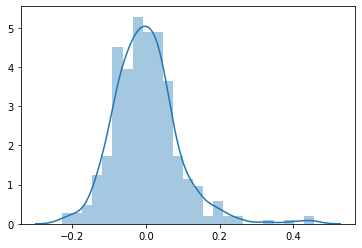

In [47]:
# plotting residuals 

sns.distplot(residual)
plt.plot()

## Step 5 - Predictions and Evaluation on the Test DataSet

In [48]:
# Scaling all numeric variables except binary and dummy variables for test dataset  

num_var = ['area','bedrooms','bathrooms','stories','parking','price']

data_test[num_var] = scalar.transform(data_test[num_var])
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.22970,0.09187,0.40000,0.00000,0.33333,1,0,0,0,0,0.00000,1,1,0
54,0.48485,0.36642,0.40000,0.50000,0.33333,1,1,0,0,1,0.33333,0,1,0
171,0.30303,0.74208,0.40000,0.00000,0.00000,1,0,0,0,0,0.33333,1,1,0
244,0.24242,0.30658,0.40000,0.00000,0.33333,1,1,1,0,0,0.00000,1,1,0
268,0.22788,0.27402,0.60000,0.00000,0.33333,1,0,0,0,1,0.00000,0,1,0


In [49]:
data_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.00000,164.00000,164.00000,164.00000,164.00000,164.00000,164.00000,164.00000,164.00000,164.00000,164.00000,164.00000,164.00000,164.00000
mean,0.26318,0.29855,0.40854,0.15854,0.26829,0.86585,0.19512,0.34756,0.03049,0.35366,0.20528,0.23780,0.42073,0.32927
std,0.17208,0.21192,0.14754,0.28108,0.27601,0.34185,0.39751,0.47765,0.17245,0.47957,0.28932,0.42704,0.49519,0.47139
min,0.00606,-0.01637,0.20000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.14242,0.14801,0.40000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.22606,0.25972,0.40000,0.00000,0.33333,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.34697,0.39744,0.40000,0.50000,0.33333,1.00000,0.00000,1.00000,0.00000,1.00000,0.33333,0.00000,1.00000,1.00000
max,0.90909,1.26399,0.80000,1.50000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


As we see that the Min and Max value of variables is not 0 and 1  
as we have trained the scalar on the train dataset the min and max values that the scalar is using is correspondin to the training set and we have transformed the Min Max values using those values 

In [50]:
# defining variables 

y_test = data_test.pop('price')
X_test = data_test

In [51]:
# adding a constant 

X_test_sm = sm.add_constant(X_test)

In [52]:
# dropping insignificant varables from the test dataset

X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'],axis=1)

In [53]:
# predicting

y_test_pred = lr_model.predict(X_test_sm)

In [54]:
# evaluate 

r2_score(y_true=y_test,y_pred=y_test_pred)

0.6713505684480789

We see that the R-Squared value obtained from train dataset is 0.68 and the value obtained from test dataset is 0.67, thus we can conclude that the model has performed well on the test set and what it had learned on the train set it has been able to genrealise it on the test set.


We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model